In [1]:
from plot_utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from algorithms.utils import *

def load_df(exp_name,groupby=None,agg=None,pre_loaded=False):
    res = []
    results_dir = RESULT_DIR / exp_name

    print('Loading raw results')
    # load all results from files in directory into res
    for p in results_dir.glob('*.pkl'):
        try:
            res += load_pickle(p)
        except EOFError:
            print(f'Error loading {p}')

    df = pd.DataFrame(res)

    return df

Loading raw results
Loading raw results


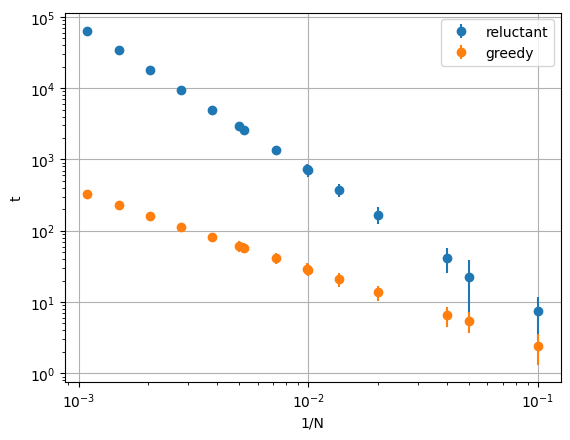

In [2]:
e_gs = -0.8

df_rel = load_df('reluctant')
mean = df_rel.groupby('n').mean()
std = df_rel.groupby('n').std()
plt.errorbar(mean.index, mean['e'], yerr=std['e'], fmt='o',label='reluctant')

df_greedy = load_df('greedy')
mean = df_greedy.groupby('n').mean()
std = df_greedy.groupby('n').std()
plt.errorbar(mean.index, mean['e'], yerr=std['e'], fmt='o',label='greedy')
plt.xlabel('N')
plt.ylabel('e(N)')
plt.legend()
plt.axhline(e_gs)
plt.savefig('reluctant.png',bbox_inches='tight')
plt.close()

mean = df_rel.groupby('n').mean()
std = df_rel.groupby('n').std()
plt.errorbar(1/mean.index, mean['e']-e_gs, yerr=std['e'], fmt='o',label='reluctant')

mean = df_greedy.groupby('n').mean()
std = df_greedy.groupby('n').std()
plt.errorbar(1/mean.index, mean['e']-e_gs, yerr=std['e'], fmt='o',label='greedy')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('1/N')
plt.ylabel('e(N) - e_gs')
plt.legend()
plt.savefig('reluctan_log.png',bbox_inches='tight')
plt.close()

mean = df_rel.groupby('n').mean()
std = df_rel.groupby('n').std()
plt.errorbar(1/mean.index, mean['t'], yerr=std['t'], fmt='o',label='reluctant')

mean = df_greedy.groupby('n').mean()
std = df_greedy.groupby('n').std()
plt.errorbar(1/mean.index, mean['t'], yerr=std['t'], fmt='o',label='greedy')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('1/N')
plt.ylabel('t')
plt.legend()
plt.grid()
plt.savefig('reluctan_log_t.png',bbox_inches='tight')

In [15]:
df_rel = load_df('reluctant')
df_greedy = load_df('greedy')

all_Ns = [40000,29213 ,21335,15581,11180,8310,6086,4432,3237,2364,1726,1261,920,672,491,358,262,191,139,102,74 ,]
df_greedy = df_greedy[df_greedy.n.isin(all_Ns)]
df_rel = df_rel[df_rel.n.isin(all_Ns)]

for name, df in [('reluctant',df_rel),('greedy',df_greedy)]:
    df = df.groupby('n').head(16000)
    df.e = df.e.apply(lambda x: x[0] if isinstance(x,np.ndarray) or isinstance(x,list) else x)
    print(df.groupby('n').count())
    df1 = df.groupby(['n']).e.agg(['mean','count','std'])
    df2 = df.groupby(['n']).t.agg(['mean'])
    df = pd.concat([df1,df2],axis=1).reset_index()
    df.columns = ['n','energy','energy_samples','energy_std','t']
    df.to_csv(f'{name}_avg.csv',index=None)

Loading raw results
Loading raw results
         e      t
n                
74   16000  16000
102  16000  16000
139  16000  16000
191  16000  16000
262  16000  16000
358  16000  16000
491  16000  16000
672  16000  16000
920  16000  16000
         e      t
n                
74   16000  16000
102  16000  16000
139  16000  16000
191  16000  16000
262  16000  16000
358  16000  16000
491  16000  16000
672  16000  16000
920  16000  16000


/tmp/ipykernel_2703642/2093132824.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.e = df.e.apply(lambda x: x[0] if isinstance(x,np.ndarray) or isinstance(x,list) else x)
/tmp/ipykernel_2703642/2093132824.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.e = df.e.apply(lambda x: x[0] if isinstance(x,np.ndarray) or isinstance(x,list) else x)


reluctant 0.435517330382869
greedy 0.3239586243484699
used largest 8 points


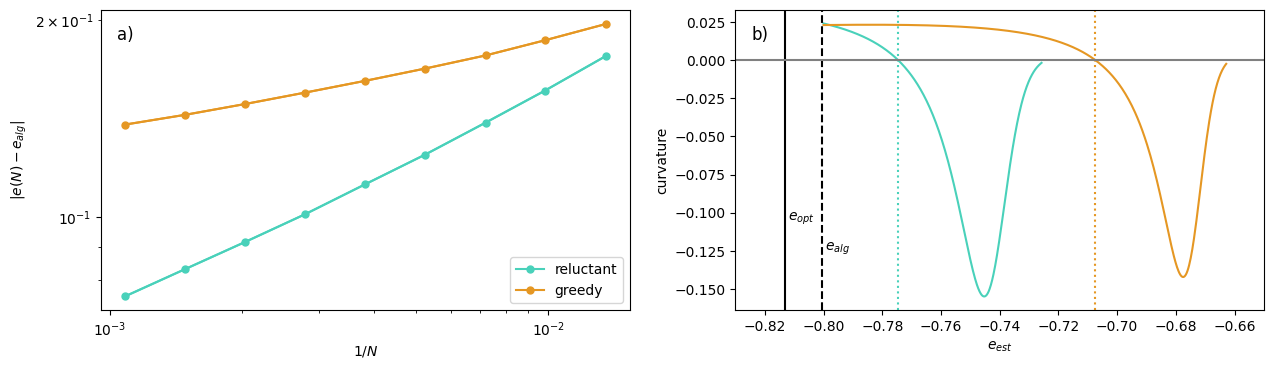

In [16]:
fig, axes = plt.subplots(1,2,figsize=(3*width,1.3*height))
ax = axes[0]
e_gs = None

df_rel = pd.read_csv( f'reluctant_avg.csv')
df_greedy = pd.read_csv( f'greedy_avg.csv')

for name, df in [('reluctant',df_rel),('greedy',df_greedy)]:
    n = df.n
    e = df.energy
    yerr = df.energy_std/np.sqrt(df.energy_samples)
    
    ax.plot(1/n,df.energy+0.8004,label=name,c=single_algo_color[name],marker='.',markersize=10)
    ax.errorbar(1/n,df.energy+0.8004,yerr=yerr,c=single_algo_color[name])
    b, c = power_law_fit(df.n[-5:],df.energy[-5:],0.8004)
    x = np.linspace(1000,50000,100)
    #ax.plot(1/x,b*x**(-c),lw=3,c='grey')
x = np.linspace(15000,1000)
#ax.annotate("1/2", xy=(np.power(10,-4.), np.power(10,-2.)), xytext=(np.power(10,-4.5), np.power(10,-2.5)),fontsize=7)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$1/N$')
ax.set_ylabel('$|e(N) - e_{alg}|$')
ax.legend(loc='lower right')

ax = axes[1]
last_x_points = 8
best_fits = {}

for name, df in [('reluctant',df_rel),('greedy',df_greedy)]:
    df = df.sort_values(by='energy')
    ns = df.n[:last_x_points]
    es = df.energy[:last_x_points]
    
    best_curvature  = 1.0
    curvatures = []
    E_ests = np.linspace(-0.80,es.min()-0.001,500)
    for i, E_est in enumerate(E_ests):
        (a,b,c), curvature = fit_parabola(np.log(1/ns),np.log(es-E_est))
        if np.abs(curvature) < np.abs(best_curvature):
            best_curvature = curvature
            best_E_est = E_est
            best_coeff = (a,b,c)
        curvatures.append(curvature)

    ax.plot(E_ests[:len(curvatures)],curvatures,label=name,c=single_algo_color[name])
    best_fits[name] = (best_E_est)
    print(name,best_coeff[1])
    
for name, fit in best_fits.items():
    ax.axvline(fit,c=single_algo_color[name],linestyle='dotted')
    #ax.axvspan(fit-0.015, fit+0.015, color=single_algo_color[name], alpha=0.2)
    
ax.axvline(-0.8004,c='black',linestyle='dashed',label='ground state')
ax.axvline(-0.8132,c='black',linestyle='solid',label='ground state')
#ax.legend()
ax.set_ylabel(f'curvature')
ax.axhline(0,c='grey')
print(f'used largest {last_x_points} points')
ax.set_xlabel('$e_{est}$')
ax.set_xlim(-0.83,-0.65)
ax.text(0.1, 0.3, '$e_{opt}$', fontsize=10, transform=ax.transAxes)
ax.text(0.17, 0.2, '$e_{alg}$', fontsize=10, transform=ax.transAxes)
axes[0].text(0.03, 0.9, f'a)', fontsize=12, transform=axes[0].transAxes)
axes[1].text(0.03, 0.9, f'b)', fontsize=12, transform=axes[1].transAxes)
#plt.subplots_adjust(wspace=0.24)
plt.savefig('p=3-energy-vs-n.png',dpi=300,bbox_inches='tight')
